                                                                       PERSONAL FINANCE TRACKER & DATA VISUALIZTAION SOFTWARE
1. Login
2. Create Account
3. Continue as Guest
4. Exit
                                                                                  𝗗𝗮𝘁𝗮 𝗩𝗶𝘀𝘂𝗮𝗹𝗶𝘇𝗮𝘁𝗶𝗼𝗻 𝗦𝗼𝗳𝘁𝘄𝗮𝗿𝗲
	MENU
1. Bar Graph
2. Histogram
3. Scatter Plot
4. Line Chart
5. Pie Chart
6. 3d Scatter
7. 3d Surface
8. All
Enter 5 observations of cash: 
Enter 5 observations of gold: 
Enter 5 observations of stocks: 
Enter 5 observations of expenditure: 


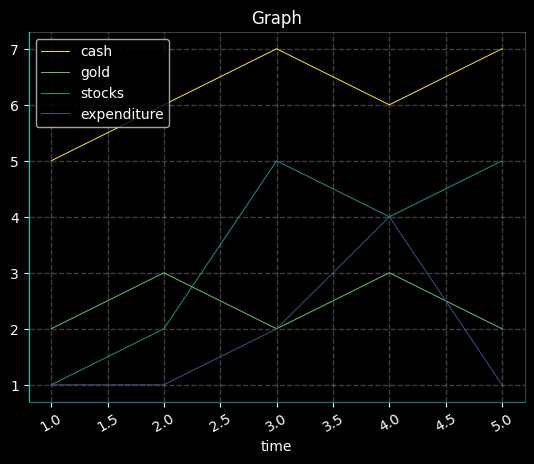

Invalid Choice! ✖
                                                                       PERSONAL FINANCE TRACKER & DATA VISUALIZTAION SOFTWARE
1. Login
2. Create Account
3. Continue as Guest
4. Exit
Made with <3 Tejas :)
...


In [5]:
import mysql.connector as my                                    #required modules
import matplotlib.pyplot as plt 
import numpy as np
import time
import datetime
import getpass
#import functions                          #user-defined
colors=["#fde725","#5ec962","#21918c","#3b528b","#440154","#f89540","#cc4778","#0d0887","#7e03a8","cyan"]
#========================================================================================================connecting mySQL
mycon=my.connect(host='localhost',user='root',passwd='tejas123',database='finance')
cursor=mycon.cursor()
cursor.execute("CREATE TABLE IF NOT EXISTS user (u_id INT PRIMARY KEY, u_name VARCHAR(255), pwd VARCHAR(255))")
cursor.execute("CREATE TABLE IF NOT EXISTS money (u_id INT PRIMARY KEY, salary FLOAT DEFAULT 0, gold FLOAT DEFAULT 0, stocks FLOAT DEFAULT 0, commodity FLOAT DEFAULT 0, sales FLOAT DEFAULT 0, expenditure FLOAT DEFAULT 0, total DOUBLE AS (salary + gold + stocks + commodity + sales - expenditure), entryDate date);")
#===========================================================================================================add dataṇ

#===========================================================================================================view data
def view_data():
    x=[]
    y=[]
    q="select * from money"
    cursor.execute(q)
    data=cursor.fetchall()
    if len(data)==0:
        print("Your dataSet is empty.")
    else:
        for i in data:
            x.append(i[0])
            y.append(i[1])
        print(9*"-","+",9*"-",sep="")
        print("| x \t |\ty |",sep="")
        print(9*"-","+",9*"-",sep="")
        for i in range(len(x)):
            print("|",x[i],7*"_","|",7*"_",y[i],"|",sep="")
        print(9*"-","+",9*"-",sep="")
#==============================================================================================================plot data
def plot_data():
    plt.style.use('dark_background')
    x=[]
    y=[]
    q="select * from points"
    cursor.execute(q)
    data=cursor.fetchall()
    for i in data:
        x.append(i[0])
        y.append(i[1])
    fig = plt.figure(figsize=(12, 9))
    plt.plot(x,y,color="teal")
    plt.scatter(x,y,color="yellow",marker="*")
    plt.title("XY - Plot", fontsize=15, fontname="Monospace")
    plt.xlabel("x points")
    plt.ylabel("y points")
    plt.tight_layout()
    plt.show()
#==================================================================================================================Account operations
def main_menu():
    ch=1
    while ch!=0:
        print(201*"=","\n",100*" ","MENU\n",201*"=","\n","1. Add Data\n2. View Data\n3. Visualise Data\n4. Save & Logout",sep="")
        ch=int(input("Enter your choice: "))
        if ch==1:
            #functions.add_data()
            pass
        elif ch==2:
            view_data()
        elif ch==3:
            plot_data()
        elif ch==4:
            print("Data saved successfully. ✓")
            break
        else:
            print("Invalid Choice. ✖")
#==========================================================================================================for guest
def guest_plot():
    plt.style.use('dark_background')
    print(201*"=")
    print("\tMENU\n1. Bar Graph\n2. Histogram\n3. Scatter Plot\n4. Line Chart\n5. Pie Chart\n6. 3d Scatter\n7. 3d Surface\n8. All")
    c=int(input("Enter your choice: "))
    x = []
    y = []
    d_attr=[]
    count=0
    if c in [1,2,3,4]:
        heading=input("Title: ")
        x_label=input("Name of independent attribute (x-axis): ")
        start=int(input("{} start value: ".format(x_label)))
        end=int(input("{} end value: ".format(x_label)))
        width=int(input("{} class width: ".format(x_label)))
        for i in range(start,end+1,width):
            x.append(i)
            count+=1
        dependent=int(input("No. of dependent attributes: "))
        for i in range(dependent):
            d_attr.append(input("Dependent Attribute {}: ".format(i+1)))
        y.append(d_attr)

        for i in range(dependent):
            print("Enter {} observations of {}: ".format(count,d_attr[i]))
            values=[]
            for j in range(count):
                value=float(input("{}{}: ".format(d_attr[i],j+1)))
                values.append(value)
            y.append(values)
        fig, ax=plt.subplots()
        width=1
        for i in range(dependent):
            if c==1:
                plt.bar(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
            elif c==2:
                plt.hist(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
            elif c==3:
                plt.scatter(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
            else:
                plt.plot(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
            width-=0.2
        plt.legend(loc="upper left")
        plt.title(heading)
        plt.xticks(rotation=30)
        plt.xlabel(x_label)
        ax.spines['bottom'].set_color('teal')
        ax.spines['top'].set_color('#ffffff40') 
        ax.spines['right'].set_color('#ffffff40')
        ax.spines['left'].set_color('darkturquoise')
        ax.grid(linestyle = "dashed",linewidth = 1, alpha = 0.25)
        #plt.savefig("example.png", dpi=1000)
        plt.show()
    if c==5:
        heading=input("Title: ")
        label=[]
        y=[]
        n=int(input("How many variables? "))
        for i in range(n):
            label.append(input("Name of variable {}: ".format(i+1)))
        for i in range(n):
            y.append(float(input("Amount of {}: ".format(label[i]))))
        plt.pie(y, labels = label, colors=colors[:n])
        plt.legend(title = heading)
        plt.show() 

    elif c==8:
        heading=input("Title: ")
        x_label=input("Name of independent attribute (x-axis): ")
        start=int(input("{} start value: ".format(x_label)))
        end=int(input("{} end value: ".format(x_label)))
        width=int(input("{} class width: ".format(x_label)))
        for i in range(start,end+1,width):
            x.append(i)
            count+=1
        dependent=int(input("No. of dependent attributes: "))
        for i in range(dependent):
            d_attr.append(input("Dependent Attribute {}: ".format(i+1)))
        y.append(d_attr)

        for i in range(dependent):
            print("Enter {} observations of {}: ".format(count,d_attr[i]))
            values=[]
            for j in range(count):
                value=float(input("{}{}: ".format(d_attr[i],j+1)))
                values.append(value)
            y.append(values)
        width=1
        fig, ax=plt.subplots(2,2)
        for i in range(dependent):
            ax[0, 0].bar(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
            ax[0, 0].set_title("Bar Graph") 
            ax[0, 0].legend(loc="upper left")
            ax[0, 1].hist(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7,width=width)
            ax[0, 1].set_title("Histogram") 
            ax[0, 1].legend(loc="upper left")
            ax[1, 0].scatter(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
            ax[1, 0].set_title("Scatter Plot") 
            ax[1, 0].legend(loc="upper left")
            ax[1, 1].plot(x,y[i+1], label=y[0][i],color=colors[i],linewidth=0.7)
            ax[1, 1].set_title("Line Chart")
            ax[1, 1].legend(loc="upper left")
            width-=0.2
        plt.title(heading)
        plt.xticks(rotation=30)
        plt.xlabel(x_label)
        #plt.savefig("example.png", dpi=1000)
        plt.show() 
    else:
        print("Invalid Choice! ✖")
        print(201*"=")

            
#=========================================================================================================Start
#==============================================================================================================
while True: 
    print(201*"=")
    greet="PERSONAL FINANCE TRACKER & DATA VISUALIZTAION SOFTWARE"
    print(70*" ",greet)
    print(201*"=","\n","1. Login\n2. Create Account\n3. Continue as Guest\n4. Exit",sep="")                #Login Menu
    user_type=int(input("Enter your choice: "))

#==========================================================================================================Login
    if user_type==1:
        print(83*" ","𝗣𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗙𝗶𝗻𝗮𝗻𝗰𝗲 𝗧𝗿𝗮𝗰𝗸𝗲𝗿")
        u_name=input("Username: ")
        q="select u_name from user "
        cursor.execute(q)
        data=cursor.fetchall()
        names=[]
        for i in data:
            names.append(i[0])
        if u_name not in names:
            print("No account exists with that username.")
        else:
            try:
                pwd = getpass.getpass()
            except Exception as error:
                print('There was some error: ', error)
            else:
                q="select pwd from user where u_name='{}'".format(u_name)
                cursor.execute(q)
                data=cursor.fetchall()
                if data[0][0]==pwd:
                    print("Login Successful.")
                    main_menu()
                else:
                    print("Incorrect password! ✖")
#=========================================================================================================Create Account
    elif user_type==2:
        print(83*" ","𝗣𝗲𝗿𝘀𝗼𝗻𝗮𝗹 𝗙𝗶𝗻𝗮𝗻𝗰𝗲 𝗧𝗿𝗮𝗰𝗸𝗲𝗿")
        ok=False
        q="select u_name from user"
        cursor.execute(q)
        data=cursor.fetchall()
        while ok!=True:                                                  #set up in mySQL before running
            u_name=input("Username: ")
            for i in data:
                ok=True
                if i[0]==u_name:
                    ok=False
                    print("An account exists with the same username. Try another one.")
                    break
        pwd=input("Password: ")
        u_id = datetime.datetime.now().strftime("%H%M%S")
        q="insert into user values({},'{}','{}')".format(u_id,u_name,pwd)
        cursor.execute(q)
        mycon.commit()
        print("Account Created Successfully! ✓")
        print("Your User ID is: ",u_id)
#==========================================================================================================Guest
    elif user_type==3:
        print(81*" ","𝗗𝗮𝘁𝗮 𝗩𝗶𝘀𝘂𝗮𝗹𝗶𝘇𝗮𝘁𝗶𝗼𝗻 𝗦𝗼𝗳𝘁𝘄𝗮𝗿𝗲")
        while True:
            guest_plot()
            a=input("Do you want to continue as guest? (y/n): ")
            if a=='n':
                break
#==========================================================================================================Exit
    elif user_type==4:
        print(201*"=")
        print("Made with <3 Tejas :)")
        time.sleep(1)
        print(".",end="")
        time.sleep(1)
        print(".",end="")
        time.sleep(1)
        print(".",end="\n")
        print(201*"=")
        break
    else:
        print("Invalid choice! ✖")